In [10]:
import numpy as np
import pandas as pd

In [11]:
from load_data import load_scaled_data

df = load_scaled_data()
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.262097,0.165901,0.614922,0.149139,0.248903,0.337191,0.544960,0.244209,0.807934,0.032371,1
1,0.045525,0.005123,0.352934,0.168567,0.051726,0.066336,0.655171,0.036283,0.899898,0.037204,1
2,0.068418,0.019803,0.366292,0.188069,0.065607,0.098164,0.746848,0.041724,0.950265,0.042222,1
3,0.071670,0.026591,0.363903,0.213671,0.068573,0.102609,0.795277,0.043795,0.952688,0.049077,1
4,0.152315,0.100769,0.456247,0.250355,0.145094,0.207586,0.767156,0.106958,0.958906,0.059471,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,0.433273,0.682917,0.345224,0.904994,0.406810,0.517174,0.229182,0.436426,0.669518,0.608684,0
18181,0.658559,0.875159,0.492965,0.905642,0.620121,0.725477,0.524943,0.605115,0.639275,0.610397,0
18182,0.499870,0.739322,0.384251,0.906891,0.468858,0.581631,0.353738,0.466260,0.696071,0.613720,0
18183,0.447190,0.708342,0.354474,0.909189,0.428283,0.530871,0.216874,0.469849,0.630873,0.619915,0


In [12]:
X, y = df.drop('Class', axis=1).to_numpy(), df['Class'].to_numpy()
y[y==0]=-1

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from LinearClassification import LinearClassifier

model = LinearClassifier(input_dim=X.shape[1])
model.initialize_weights_multistart(num_starts=5)
model.stochastic_gradient_descent(X_train, y_train, epochs=20)
margins = model.compute_margin(X_test, y_test)
print("Margins:", margins)

Margins: [1.75696489 0.82632011 1.46958827 ... 0.65748952 1.39895412 2.66458522]


In [15]:
for i in range(len(model.loss_history)):
    print(f"loss: {model.loss_history[i]}, Q: {model.recurent_loss_history[i]}")

loss: 0.27752952965622446, Q: 0.00027752952965622447
loss: 0.2887471124460623, Q: 0.0005659991125726307
loss: 0.32614676989209, Q: 0.000891579883352148
loss: 0.29529495914966614, Q: 0.001185983262618462
loss: 0.28874711446496787, Q: 0.0014735443938208115
loss: 0.32614676989209623, Q: 0.0017982176193190869
loss: 0.29529495914967163, Q: 0.0020917143608494395
loss: 0.2887471144649729, Q: 0.0023783697609535627
loss: 0.32614676989210245, Q: 0.0027021381610847117
loss: 0.29529495914967707, Q: 0.002994730982073304
loss: 0.288747114464978, Q: 0.003280483365556209
loss: 0.32614676989210867, Q: 0.003603349652082761
loss: 0.2952949591496825, Q: 0.003895041261580361
loss: 0.2887471144649831, Q: 0.004179893334783764
loss: 0.326146769892115, Q: 0.004501860211341095
loss: 0.29529495914968795, Q: 0.004792653310279442
loss: 0.2887471144649882, Q: 0.005076607771434151
loss: 0.32614676989212116, Q: 0.005397677933554838
loss: 0.29529495914969345, Q: 0.0056875752147709764
loss: 0.28874711446499324, Q: 0.00

## Метрики

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=(1, -1)))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98      2005
          -1       0.97      0.99      0.98      1632

    accuracy                           0.98      3637
   macro avg       0.98      0.98      0.98      3637
weighted avg       0.98      0.98      0.98      3637



In [18]:
import matplotlib.pyplot as plt
def plot_margin(margins):
    margins = np.sort(margins.flatten())
    dMargin = margins.max()*0.3
    plt.plot(margins, c='k', linewidth=3)

    plt.axhline(y=0, c='k', linewidth=0.35)

    x = np.arange(len(margins))
    plt.gca().fill_between(x, margins, where=(margins>=dMargin), color='#00ff00')
    plt.gca().fill_between(x, margins, where=(margins<=-dMargin), color='#ff0000')
    plt.gca().fill_between(x, margins, where=np.bitwise_and(margins >= -dMargin, margins <= dMargin), color='#ffff00')

    plt.ylabel("Margin")
    plt.gcf().set_size_inches(9, 6)

## Отступ

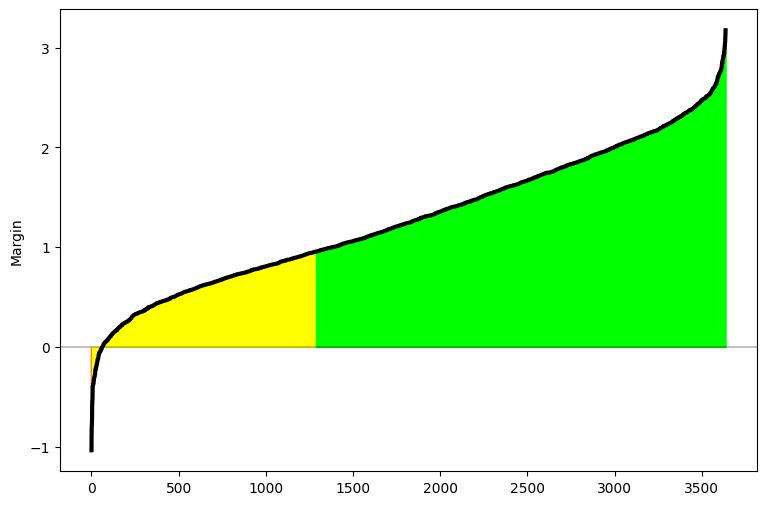

In [19]:
plot_margin(model.compute_margin(X_test, y_test))

In [20]:
from sklearn.linear_model import SGDClassifier

cls_sklearn = SGDClassifier(penalty='l2')
cls_sklearn.fit(X_train, y_train, intercept_init=5)
y_pred = cls_sklearn.predict(X_test)
print(classification_report(y_test, y_pred, labels=(1, -1)))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2005
          -1       0.99      0.98      0.99      1632

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



## Время

In [21]:
cls_sklearn = SGDClassifier(penalty='l2')
%timeit cls_sklearn.fit(X_train, y_train, intercept_init=5)

19.9 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
model = LinearClassifier(input_dim=X.shape[1])
model.initialize_weights_multistart(num_starts=5)
%timeit model.stochastic_gradient_descent(X_train, y_train, epochs=20)

18.5 s ± 3.81 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
